In [ ]:
# default_exp mli


# SHAP

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *

In [ ]:
#collapse_output
!mamba install -y -c conda-forge -c fastai fastcore nbdev shap lightgbm matplotlib pandas


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.7.6) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['fastcore', 'nbdev', 'shap', 'lightgbm', 'matplotlib', 'pandas']

pkgs/main/linux-64       [=>     

In [ ]:
%matplotlib inline
import lightgbm as lgb
import shap
shap.initjs()
shap.__version__, lgb.__version__

('0.37.0', '3.1.1')

In [ ]:
X, y = shap.datasets.adult()
X


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [ ]:
y


array([False, False, False, ..., False, False,  True])

In [ ]:
from lightgbm.sklearn import LGBMClassifier
model = LGBMClassifier()

In [ ]:
# export
from fastcore.basics import store_attr
import shap


class Shap:
    def __init__(self, X, y, model, n_samples=1000):
        store_attr()

        model.fit(X, y)

        self.samples = samples = X.iloc[:n_samples]
        self.explainer = shap.Explainer(model, samples)
        self.shap_values = self.explainer(samples)

    def force_plot(self, n_plots=1):
        plot = shap.force_plot(
            self.explainer.expected_value,
            self.shap_values.values[:n_plots],
            self.samples.iloc[:n_plots],
            link="logit",
        )
        return plot

    def waterfall_plot(self, id: int):
        plot = shap.plots.waterfall(self.shap_values[id])
        return plot


In [ ]:
X, y = shap.datasets.adult() 
sh = Shap(X, y, model)

In [ ]:
sh.force_plot()

In [ ]:
sh.force_plot(1000)

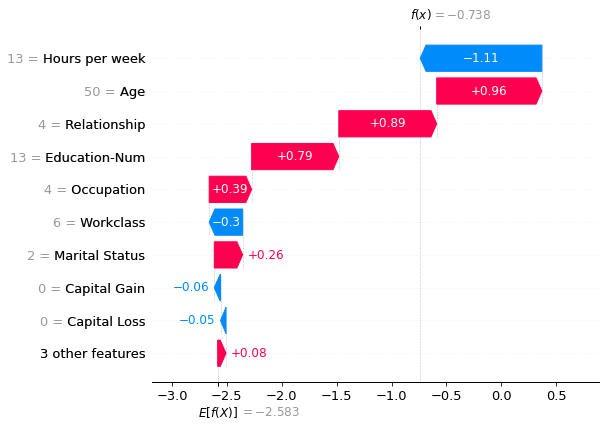

In [ ]:
sh.waterfall_plot(id=1)

In [ ]:
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_shap.ipynb.
Converted index.ipynb.
